In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/var/folders/m8/ss8240rn1_n5_crd6h3q40zc0000gn/T/ipykernel_32822/3116122706.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_pickle('data/dataset/cleandata.pkl')
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False


In [3]:
#Convert time columns to standard format
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime']) 
df['currentExpDate'] = pd.to_datetime(df['currentExpDate'])
df['accountOpenDate'] = pd.to_datetime(df['accountOpenDate'])
df['dateOfLastAddressChange'] = pd.to_datetime(df['dateOfLastAddressChange'])

/var/folders/m8/ss8240rn1_n5_crd6h3q40zc0000gn/T/ipykernel_32822/2208841163.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['currentExpDate'] = pd.to_datetime(df['currentExpDate'])


### Reversed Transaction

The criteria for a reversed transaction are as follows: 
* Each purchase should have a corresponding reversal.
* The transactionDateTime of the purchase should precede that of the reversal.

Transaction Type plot: showing the breakdown of each transaction types 

In [4]:
transaction_type_counts = df['transactionType'].value_counts()

print(transaction_type_counts)

transactionType
PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
Name: count, dtype: int64


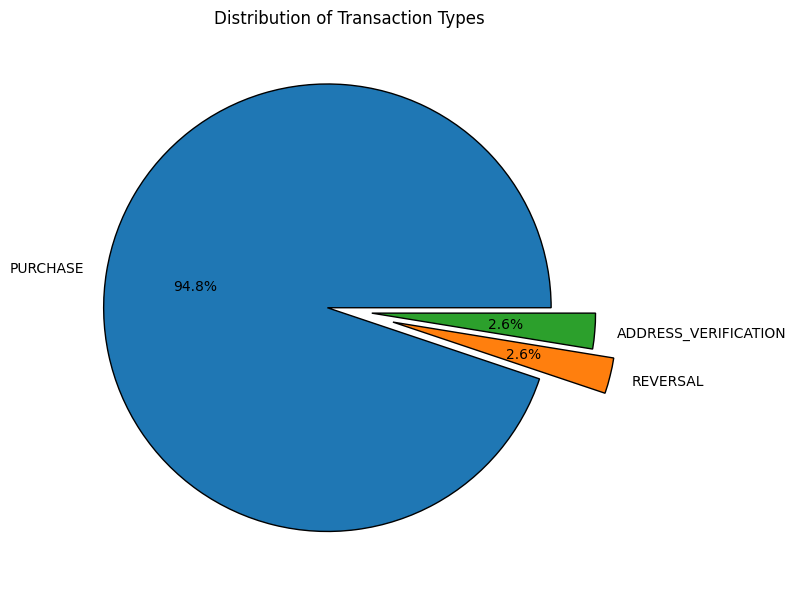

In [5]:
# Calculate the counts of each transaction type
transaction_type_counts = df['transactionType'].value_counts()

# Define explode values for each slice
explode = [0.1, 0.2, 0.1] + [0] * (len(transaction_type_counts) - 3)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(transaction_type_counts, labels=transaction_type_counts.index, explode=explode, wedgeprops={'edgecolor': 'black'}, autopct='%1.1f%%')

# Adding legend with counts
# plt.legend(patches, labels=transaction_type_counts.index, loc="upper right")
plt.title('Distribution of Transaction Types')

# Displaying the chart
plt.tight_layout()
plt.show()

In [25]:
'''
Looking at the dataset, I notice not all reversal has a purchase of that transaction
Therefore, using the transactionType column would not give us accurate total number of transactions and total dollar amount do you estimate for the reversed transactions
Since, purchase is followed by a reversal. I check all purchase and reversal that are similiar and merge them. 
'''

'\nLooking at the dataset, I notice not all reversal has a purchase of that transaction\nTherefore, using the transactionType column would not give us accurate total number of transactions and total dollar amount do you estimate for the reversed transactions\nSince, purchase is followed by a reversal. I check all purchase and reversal that are similiar and merge them. \n'

In [6]:
#Select duplicated rows based on 'accountNumber', 'customerId', 'transactionAmount', 'merchantName'
duplicated = df[df.duplicated(['accountNumber', 'customerId', 'transactionAmount', 'merchantName'], keep=False)]
duplicated.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
2,737265056,737265056,5000,5000.00,2016-11-08 09:18:39,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
3,737265056,737265056,5000,5000.00,2016-12-10 02:14:50,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
11,830329091,830329091,5000,5000.00,2016-12-07 16:34:04,40.75,GreenCook,US,US,09,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,False,False,False
12,830329091,830329091,5000,4959.25,2016-12-14 10:00:35,40.75,GreenCook,US,US,09,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,40.75,False,False,False
13,830329091,830329091,5000,4918.50,2016-12-20 18:38:23,40.75,GreenCook,US,US,09,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,81.50,False,False,False


In [7]:
# Get all records whose transaction type is reversal from the duplicated data
pur_tran = duplicated[duplicated.transactionType == 'PURCHASE']
rev_tran = duplicated[duplicated.transactionType == 'REVERSAL']

print(pur_tran['transactionAmount'].count())
print(rev_tran['transactionAmount'].count())

83252
18363


In [8]:
# Inner joined the 2 datasets by 'accountNumber', 'customerId', 'transactionAmount', 'merchantName'
reversed_trans = pd.merge(pur_tran, rev_tran, on=['accountNumber', 'customerId', 'transactionAmount', 'merchantName'], how='inner')
reversed_trans.head()

,accountNumber,customerId,creditLimit_x,availableMoney_x,transactionDateTime_x,transactionAmount,merchantName,acqCountry_x,merchantCountryCode_x,posEntryMode_x,...,accountOpenDate_y,dateOfLastAddressChange_y,cardCVV_y,enteredCVV_y,cardLast4Digits_y,transactionType_y,currentBalance_y,cardPresent_y,expirationDateKeyInMatch_y,isFraud_y
0,574788567,574788567,2500,2416.11,2016-05-24 01:35:33,215.13,Convenient Tire,US,US,09,...,2015-10-13,2015-10-13,206,206,8522,REVERSAL,299.02,True,False,False
1,924729945,924729945,50000,50000.00,2016-10-04 04:20:04,168.57,discount.com,US,US,05,...,2014-07-25,2014-07-25,205,265,9459,REVERSAL,168.57,False,False,False
2,984504651,984504651,50000,49138.85,2016-01-06 04:08:06,83.64,1st Sandwitch Bar #801388,US,US,09,...,2015-07-27,2015-07-27,640,640,8332,REVERSAL,11909.30,True,False,False
3,984504651,984504651,50000,46818.15,2016-01-16 09:52:30,450.74,Planet Fitness #849960,US,US,05,...,2015-07-27,2015-07-27,640,640,8332,REVERSAL,3632.59,False,False,False
4,984504651,984504651,50000,46341.05,2016-01-17 08:13:08,81.73,AMC #724446,US,US,09,...,2015-07-27,2015-07-27,640,640,8332,REVERSAL,8090.70,True,False,False


In [9]:
# Select rows which its purchasing transaction DateTime is earlier than its reversal transaction DateTime.
reversed_trans = reversed_trans[reversed_trans.transactionDateTime_x < reversed_trans.transactionDateTime_y]

In [10]:
# The final reversal transaction data
reversed_trans[['accountNumber', 'customerId', 'transactionAmount', 'merchantName', 'transactionDateTime_x', 'transactionDateTime_y',
               'transactionType_x', 'transactionType_y', 'isFraud_x', 'isFraud_y']].head()

,accountNumber,customerId,transactionAmount,merchantName,transactionDateTime_x,transactionDateTime_y,transactionType_x,transactionType_y,isFraud_x,isFraud_y
0,574788567,574788567,215.13,Convenient Tire,2016-05-24 01:35:33,2016-05-24 01:38:03,PURCHASE,REVERSAL,False,False
1,924729945,924729945,168.57,discount.com,2016-10-04 04:20:04,2016-10-19 14:01:45,PURCHASE,REVERSAL,False,False
2,984504651,984504651,83.64,1st Sandwitch Bar #801388,2016-01-06 04:08:06,2016-02-04 00:14:42,PURCHASE,REVERSAL,False,False
3,984504651,984504651,450.74,Planet Fitness #849960,2016-01-16 09:52:30,2016-01-16 09:53:15,PURCHASE,REVERSAL,False,False
4,984504651,984504651,81.73,AMC #724446,2016-01-17 08:13:08,2016-01-25 20:39:15,PURCHASE,REVERSAL,False,False


In [11]:
reversed_trans['isFraud_y'].value_counts()

isFraud_y
False    17690
True       309
Name: count, dtype: int64

In [12]:
'''
Check if most reversal is a Fraudulent transaction
'''
# Count the number of reversed transactions involving fraudulent money
fraudulent_reversals_count = reversed_trans[reversed_trans['isFraud_y'] == True].shape[0]

# Calculate the percentage of reversed transactions involving fraudulent money
total_reversals_count = reversed_trans.shape[0]
percentage_fraudulent_reversals = (fraudulent_reversals_count / total_reversals_count) * 100

# Display the result
print("Number of reversed transactions involving fraudulent money:", fraudulent_reversals_count)
print("Total number of reversed transactions:", total_reversals_count)
print("Percentage of reversed transactions involving fraudulent money: {:.2f}%".format(percentage_fraudulent_reversals))


Number of reversed transactions involving fraudulent money: 309
Total number of reversed transactions: 17999
Percentage of reversed transactions involving fraudulent money: 1.72%


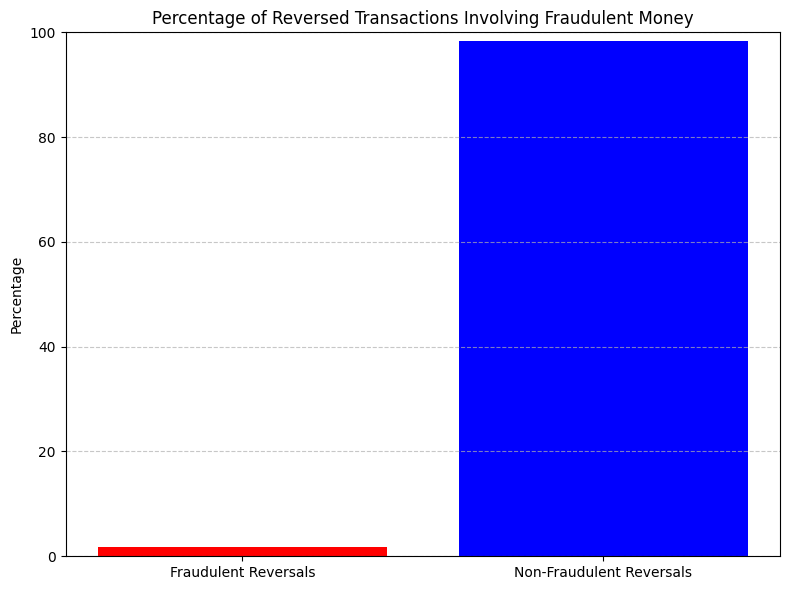

In [13]:
# Calculate the percentage of reversed transactions involving fraudulent money
percentage_non_fraudulent_reversals = 100 - percentage_fraudulent_reversals

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Fraudulent Reversals', 'Non-Fraudulent Reversals'], [percentage_fraudulent_reversals, percentage_non_fraudulent_reversals], color=['red', 'blue'])
plt.title('Percentage of Reversed Transactions Involving Fraudulent Money')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Setting y-axis limit from 0 to 100
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()


In [14]:
reversed_trans_amount = "{:,}".format(reversed_trans.transactionAmount.sum())
reversed_trans_count = "{:,}".format(reversed_trans.shape[0])

print(f"Total number of reversed count: {reversed_trans_count}")
print(f"Total number of reversed transactions: ${reversed_trans_amount}")

Total number of reversed count: 17,999
Total number of reversed transactions: $2,701,311.87


Out of 17,999 reversed transactions, only 309 (1.72%) involve fraudulent money. 

This suggests that the majority of reversed transactions are not fraudulent, indicating a relatively low occurrence of fraudulent activity in the reversal transactions. 

Further investigation may be needed to identify patterns or trends in fraudulent reversals.


In [27]:
'''
The question said: "please consider the first transaction to be "normal" and exclude it from the number of transaction and dollar amount counts"

#QUESTION: 
why are we excluding the first transaction?
It is the first purchase or reversal?
what do the question mean by "normal"?
should i do that for reversal and multi-swipe 
The above question need to be answered


Doing that would reduce our count and amount 

Total number of reversed count: 17,999 - 1 = 17,998
Total number of reversed transactions: $2,701,311.87 - 215.13 = 2,701,096.74 US dollars

'''

'\nThe question said: "please consider the first transaction to be "normal" and exclude it from the number of transaction and dollar amount counts"\n\n#QUESTION: \nwhy are we excluding the first transaction?\nIt is the first purchase or reversal?\nwhat do the question mean by "normal"?\nshould i do that for reversal and multi-swipe \nThe above question need to be answered\n\n\nDoing that would reduce our count and amount \n\nTotal number of reversed count: 17,999 - 1 = 17,998\nTotal number of reversed transactions: $2,701,311.87 - 215.13 = 2,701,096.74 US dollars\n\n'

### Reversed Transaction Estimates
* Number of reversed transactions: 17,999 transactions
* Total dollar estimate for reversed transactions: $2,701,311.87

### Multi swipe Transaction

In [15]:
# Select duplicated rows 
duplicated = df[df.duplicated(['accountNumber', 'customerId', 'transactionAmount', 'merchantName', 'transactionType'], keep=False)]

In [16]:
# Select purchasing transactions and sort the purchasing data by transactionDateTime
multi_swipe = duplicated[duplicated.transactionType == 'PURCHASE']
multi_swipe.sort_values(['accountNumber', 'customerId', 'merchantName', 'transactionDateTime'])
multi_swipe.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
2,737265056,737265056,5000,5000.00,2016-11-08 09:18:39,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
3,737265056,737265056,5000,5000.00,2016-12-10 02:14:50,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
11,830329091,830329091,5000,5000.00,2016-12-07 16:34:04,40.75,GreenCook,US,US,09,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,False,False,False
12,830329091,830329091,5000,4959.25,2016-12-14 10:00:35,40.75,GreenCook,US,US,09,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,40.75,False,False,False
13,830329091,830329091,5000,4918.50,2016-12-20 18:38:23,40.75,GreenCook,US,US,09,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,81.50,False,False,False


In [17]:
# Identify multi-swipe transactions
# Adjust the time threshold as needed, we used 5min since that multi-swipe transaction mostly within short period
time_threshold = pd.Timedelta(minutes=5)  
multi_swipe['time_diff'] = multi_swipe.groupby(['accountNumber', 'customerId', 'merchantName', 'transactionAmount'])['transactionDateTime'].diff()
multi_swipe['multi_swipe'] = multi_swipe['time_diff'].lt(time_threshold)

/var/folders/m8/ss8240rn1_n5_crd6h3q40zc0000gn/T/ipykernel_32822/1217859098.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_swipe['time_diff'] = multi_swipe.groupby(['accountNumber', 'customerId', 'merchantName', 'transactionAmount'])['transactionDateTime'].diff()
/var/folders/m8/ss8240rn1_n5_crd6h3q40zc0000gn/T/ipykernel_32822/1217859098.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_swipe['multi_swipe'] = multi_swipe['time_diff'].lt(time_threshold)


In [18]:
multi_swipe.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,time_diff,multi_swipe
2,737265056,737265056,5000,5000.00,2016-11-08 09:18:39,7.47,Play Store,US,US,09,...,486,486,767,PURCHASE,0.00,False,False,False,NaT,False
3,737265056,737265056,5000,5000.00,2016-12-10 02:14:50,7.47,Play Store,US,US,09,...,486,486,767,PURCHASE,0.00,False,False,False,31 days 16:56:11,False
11,830329091,830329091,5000,5000.00,2016-12-07 16:34:04,40.75,GreenCook,US,US,09,...,885,885,3143,PURCHASE,0.00,False,False,False,NaT,False
12,830329091,830329091,5000,4959.25,2016-12-14 10:00:35,40.75,GreenCook,US,US,09,...,885,885,3143,PURCHASE,40.75,False,False,False,6 days 17:26:31,False
13,830329091,830329091,5000,4918.50,2016-12-20 18:38:23,40.75,GreenCook,US,US,09,...,885,885,3143,PURCHASE,81.50,False,False,False,6 days 08:37:48,False


In [19]:
multi_swipe_amount = "{:,}".format(multi_swipe.transactionAmount.sum())
multi_swipe_count = "{:,}".format(multi_swipe.shape[0])

print(f"Total number of reversed count: {multi_swipe_count}")
print(f"Total number of reversed transactions: ${multi_swipe_amount}")

Total number of reversed count: 65,796
Total number of reversed transactions: $3,679,356.2399999998


### Multi-swipe Estimates
* Number of multi-swipe transactions: 65,796 transactions
* Total dollar estimate for multi-swipe transactions: $3,679,356.2

In [20]:
df.merchantCategoryCode.value_counts(normalize=False)

merchantCategoryCode
online_retail           202156
fastfood                112138
entertainment            80098
food                     75490
online_gifts             66238
rideshare                51136
hotels                   34097
fuel                     23910
subscriptions            22901
auto                     21651
health                   19092
personal care            18964
airline                  15412
mobileapps               14990
online_subscriptions     11067
furniture                 7432
food_delivery             6000
gym                       2209
cable/phone               1382
Name: count, dtype: int64

In [21]:
#Get proportion of different types of merchant
all_pro = df.merchantCategoryCode.value_counts(normalize=True).rename_axis('MerchantCategory').to_frame('overall_proportion')
rev_pro = reversed_trans.merchantCategoryCode_x.value_counts(normalize=True).rename_axis('MerchantCategory').to_frame('reversed_proportion')
mul_pro = multi_swipe.merchantCategoryCode.value_counts(normalize=True).rename_axis('MerchantCategory').to_frame('multiswipe_proportion')

In [22]:
# Compare proportion of different types of merchant
mer_pro = all_pro.merge(rev_pro, how='left', on=['MerchantCategory']).merge(mul_pro, how='left', on=['MerchantCategory'])
mer_pro.reset_index(inplace=True)
# Fill missing values with 0
mer_pro.fillna(0, inplace=True)
mer_pro

,MerchantCategory,overall_proportion,reversed_proportion,multiswipe_proportion
0,online_retail,0.257077,0.275460,0.068272
1,fastfood,0.142603,0.155620,0.034759
2,entertainment,0.101859,0.108950,0.025640
3,food,0.095999,0.104784,0.022509
4,online_gifts,0.084233,0.095116,0.073242
5,rideshare,0.065028,0.067782,0.020594
6,hotels,0.043360,0.049725,0.010016
7,fuel,0.030406,0.000000,0.186531
8,subscriptions,0.029123,0.030502,0.006931
9,auto,0.027533,0.028224,0.006292


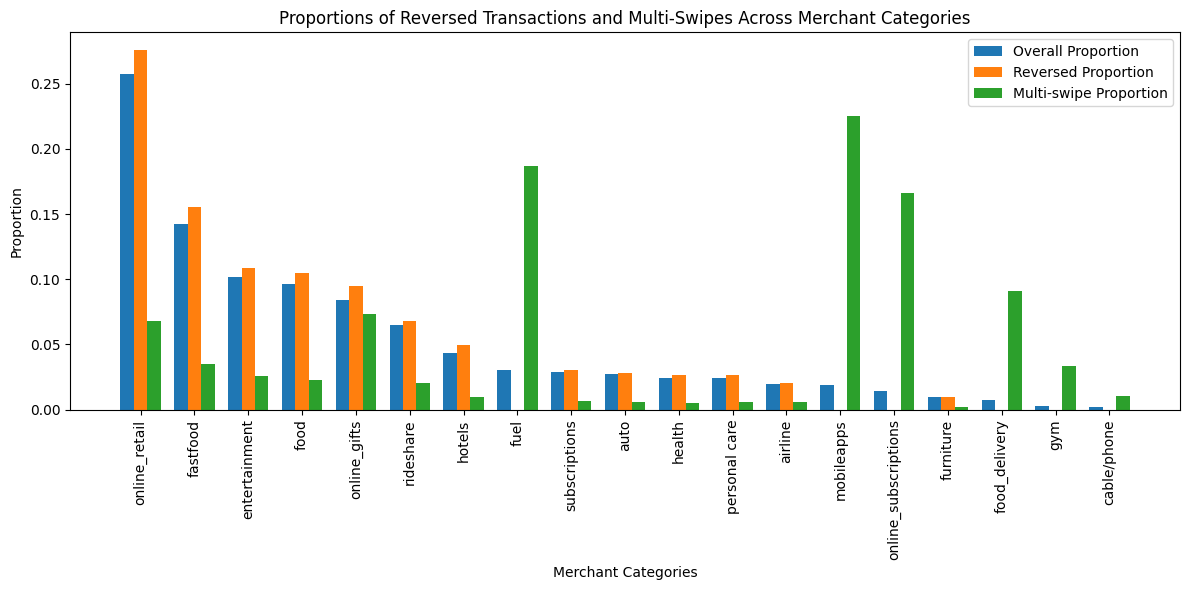

In [23]:
# Set the width of the bars
bar_width = 0.25

# Set the x locations for the groups
index = np.arange((mer_pro['MerchantCategory']).count())

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(index, mer_pro['overall_proportion'], bar_width, label='Overall Proportion')
plt.bar(index + bar_width, mer_pro['reversed_proportion'], bar_width, label='Reversed Proportion')
plt.bar(index + (2 * bar_width), mer_pro['multiswipe_proportion'], bar_width, label='Multi-swipe Proportion')

# Add labels, title, and legend
plt.xlabel('Merchant Categories')
plt.ylabel('Proportion')
plt.title('Proportions of Reversed Transactions and Multi-Swipes Across Merchant Categories')
plt.xticks(index + bar_width, mer_pro['MerchantCategory'], rotation=90)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


 Certain merchant categories, such as mobileapps, online_subscriptions and fuel, have high proportions of multi-swipes, suggesting a higher likelihood of duplicate transactions in these categories. 

 
 However, some categories like online retail and fast food also have notable proportions of reversed transactions.